In [1]:
#Classification Tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
                                                  

In [2]:
data_for_model = pd.read_csv("sample_data_pca.csv")

In [3]:
data_for_model

,user_id,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
0,1,1,0.0000,0.0891,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0001,0.0606,0.0000,0.0000,0.0578,0.1554,0.0001,0.0000,0.0000
1,2,0,0.0000,0.0000,0.0,0.0,0.0000,0.0001,0.0,0.0,...,0.0008,0.0000,0.0016,0.0000,0.0000,0.0000,0.0030,0.0034,0.8695,0.0037
2,3,1,0.0002,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7179,0.0000,0.0008
3,4,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0146,0.0275,0.0060,0.0000,0.1724,0.0000,0.0021,0.0012,0.0000,0.0000
4,5,1,0.0006,0.0000,0.0,0.0,0.0000,0.0002,0.0,0.0,...,0.0310,0.1061,0.0000,0.0000,0.0010,0.0000,0.6773,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,352,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0000,0.0002,0.0066,0.0001,0.0000,0.6765,0.0420,0.0000,0.0000
352,353,1,0.0000,0.0000,0.0,0.0,0.1759,0.0000,0.0,0.0,...,0.0000,0.0000,0.0000,0.0015,0.0001,0.0007,0.0002,0.0000,0.0032,0.1227
353,354,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0010,0.7944,0.0000,0.0000,0.0000
354,355,1,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0000,0.0061,0.0000,0.3138,0.0000,0.0000,0.0000,0.0000,0.0163,0.0000


In [4]:
#Drop unnecessary column
data_for_model.drop("user_id", axis=1, inplace=True) #True so that it is applied

In [5]:
#Shuffle data
#Best practice step
#This aids us in being sensitive to how data is organized - it may or may not have an impact on the model itself
data_for_model = shuffle(data_for_model, random_state=42)

In [6]:
#Class Balance - we need to think about how label/DV is balanced here
data_for_model["purchased_album"].value_counts()

purchased_album
1    190
0    166
Name: count, dtype: int64

In [7]:
data_for_model["purchased_album"].value_counts(normalize=True)

purchased_album
1    0.533708
0    0.466292
Name: proportion, dtype: float64

In [8]:
data_for_model

,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,artist9,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
227,1,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0045,0.0000,0.2887,0.0000,0.0000,0.0000,0.0000,0.0136,0.0000
42,1,0.0278,0.0000,0.0000,0.0000,0.0,0.0036,0.0002,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1894,0.0000,0.0000,0.0000
256,1,0.0000,0.0000,0.0367,0.0053,0.0,0.0000,0.0367,0.0000,0.0,...,0.0000,0.0002,0.0000,0.0002,0.0000,0.0001,0.0000,0.0243,0.0000,0.0005
182,1,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0011,0.8431,0.0000,0.0000,0.0000
56,1,0.0007,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0011,0.0163,0.0000,0.0000,0.0000,0.0000,0.0000,0.0179,0.8111,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0.0099,0.0000,0.0000,0.0000,0.0,0.0006,0.0000,0.0000,0.0,...,0.0001,0.0851,0.0000,0.4204,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
106,0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.1069,0.0000,0.0000,0.0890,0.0000,0.0000,0.0000,0.0138
270,1,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0817,0.0000,0.0035,0.0000,0.0168,0.0184,0.0251
348,0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0034,0.0,...,0.0004,0.0000,0.6866,0.0000,0.0000,0.0029,0.0000,0.0003,0.0183,0.0029


In [9]:
#Dealing with missing values

data_for_model.isna().sum()

purchased_album    0
artist1            0
artist2            0
artist3            0
artist4            0
                  ..
artist96           0
artist97           0
artist98           0
artist99           0
artist100          0
Length: 101, dtype: int64

In [10]:
#Need results for all columns - we can't see it based on the last variable
data_for_model.isna().sum().sum()

0

In [11]:
data_for_model.dropna(how = "any", inplace=True) #If any missing values, then whole row is dropped, True so that it is applied

In [12]:
data_for_model.shape

(356, 101)

In [13]:
data_for_model

,purchased_album,artist1,artist2,artist3,artist4,artist5,artist6,artist7,artist8,artist9,...,artist91,artist92,artist93,artist94,artist95,artist96,artist97,artist98,artist99,artist100
227,1,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0045,0.0000,0.2887,0.0000,0.0000,0.0000,0.0000,0.0136,0.0000
42,1,0.0278,0.0000,0.0000,0.0000,0.0,0.0036,0.0002,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1894,0.0000,0.0000,0.0000
256,1,0.0000,0.0000,0.0367,0.0053,0.0,0.0000,0.0367,0.0000,0.0,...,0.0000,0.0002,0.0000,0.0002,0.0000,0.0001,0.0000,0.0243,0.0000,0.0005
182,1,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0011,0.8431,0.0000,0.0000,0.0000
56,1,0.0007,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0011,0.0163,0.0000,0.0000,0.0000,0.0000,0.0000,0.0179,0.8111,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0.0099,0.0000,0.0000,0.0000,0.0,0.0006,0.0000,0.0000,0.0,...,0.0001,0.0851,0.0000,0.4204,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
106,0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.1069,0.0000,0.0000,0.0890,0.0000,0.0000,0.0000,0.0138
270,1,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0817,0.0000,0.0035,0.0000,0.0168,0.0184,0.0251
348,0,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0034,0.0,...,0.0004,0.0000,0.6866,0.0000,0.0000,0.0029,0.0000,0.0003,0.0183,0.0029


In [14]:
#Split input variables and output variables
X = data_for_model.drop(["purchased_album"], axis=1)
y = data_for_model["purchased_album"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y) #stratify=y this means training and test sets have same proportion of 0s and 1s as overall data 

In [15]:
#Feature Scaling
scale_standard = StandardScaler()

X_train = scale_standard.fit_transform(X_train)
X_test = scale_standard.fit_transform(X_test)

In [16]:
#Apply PCA 
#Instantiate object
pca = PCA(n_components = None, random_state = 42)
pca.fit(X_train)

PCA(random_state=42)

In [17]:
#Extract the explained variance across components
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = pca.explained_variance_ratio_.cumsum()

C:\Users\19144\AppData\Local\Temp\ipykernel_37828\1626105609.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


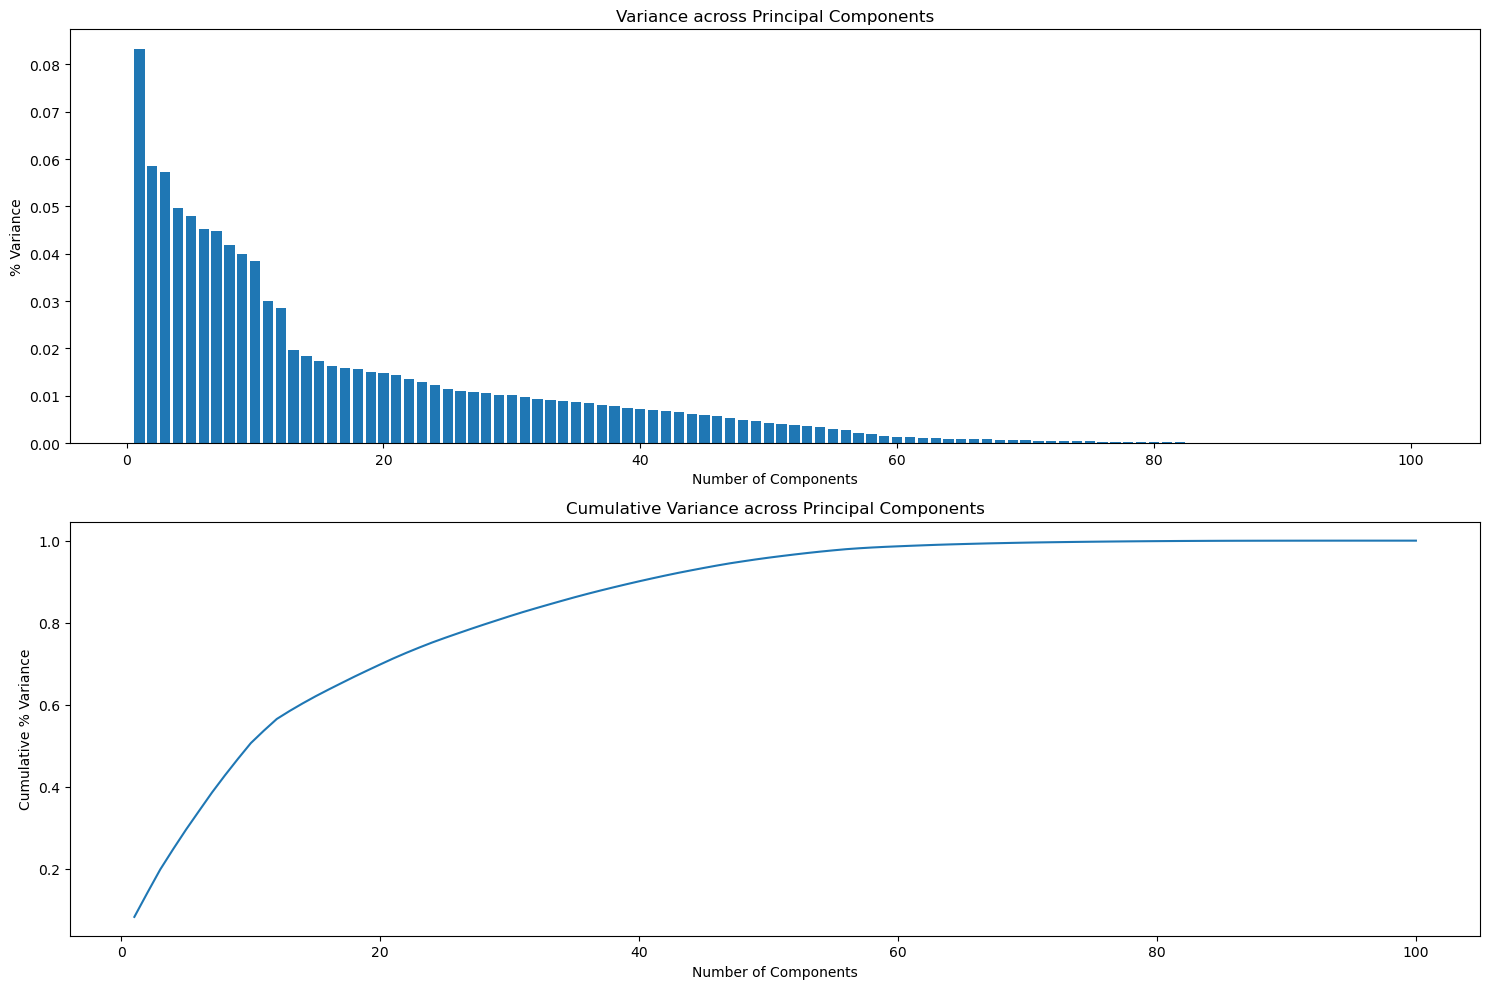

In [18]:
#Create list for number of components
num_vars_list = list(range(1,101))
plt.figure(figsize =(15,10))
#Plot the variance explained by each component
plt.subplot(2,1,1)
plt.bar(num_vars_list,explained_variance)
plt.title("Variance across Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("% Variance")
plt.tight_layout()

#Plot the cumulative variance
plt.subplot(2,1,2)
plt.plot(num_vars_list,explained_variance_cumulative)
plt.title("Cumulative Variance across Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative % Variance")
plt.tight_layout()
plt.show()

In [19]:
#Looks like about 75% is explained by 20 components

In [20]:
pca = PCA(n_components = 0.75, random_state = 42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [21]:
print(X_train.shape) #24 components/columns
print(X_test.shape) #24 components/columns
#This is the amount of components needed to explain 75% of variance

(284, 24)
(72, 24)


In [22]:
#You can also get this through
pca.n_components_

24

In [23]:
#Apply PCA with selected number of components

clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
#Assess model accuracy
y_pred_class = clf.predict(X_test)
accuracy_score(y_test, y_pred_class)

0.7916666666666666

In [25]:
 #79% classification accuracy based on 24/100 input variables

In [ ]:
#PCA can be great addition to modeling work flow
#PCA components are not correlated with each other
#Important for linear and logistic regression
#PCA also helpful for clustering